# Contrastive learning density estimation

Author: Christoph Weniger, June 2020

In [1]:
import numpy as np
import pylab as plt
import swyft

In [2]:
DEVICE = 'cuda:0'
NDIM = 4  # Dimensionality of parameter z
NROUNDS = 3  # Optimization rounds

In [3]:
# Generative model, x~p(x|z)
def model(z, sigma = 0.01):
    x = np.linspace(-5, 5, 50)
    t = np.sin(x)*z[0]
    t += np.cos(x)*z[1]
    t += np.sin(2*x)*z[2]
    t += np.cos(2*x)*z[3]
    n = np.random.randn(*t.shape)*sigma
    return t + n

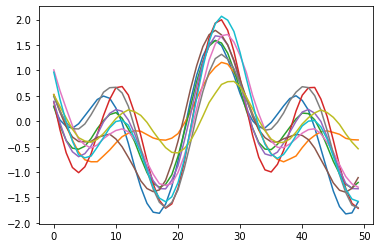

In [4]:
for i in range(10):
    z = np.random.rand(NDIM)
    x = model(z)
    plt.plot(x)

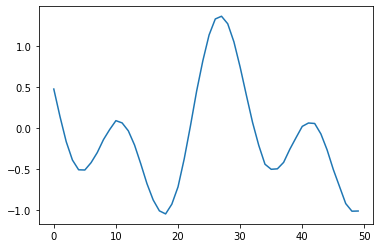

In [5]:
z0 = np.ones(NDIM)*0.5
x0 = model(z0)
plt.plot(x0)

In [6]:
sw = swyft.SWYFT(model, NDIM, x0, device = DEVICE)

In [7]:
for i in range(NROUNDS):
    sw.round(n_sims = 3000, n_train = 3000, lr = 1e-4)

 30%|██▉       | 889/3000 [00:00<00:00, 8888.33it/s]

Round:  0
Generate samples from constrained prior: z~pc(z)
Generate corresponding draws x ~ p(x|z)


  0%|          | 0/3000 [00:00<?, ?it/s]

Network optimization


100%|██████████| 3000/3000 [00:38<00:00, 78.51it/s]


Round:  1
Generate samples from constrained prior: z~pc(z)


 32%|███▏      | 958/3000 [00:00<00:00, 9572.71it/s]

Constrained posterior volume: 0.0016023456
Generate corresponding draws x ~ p(x|z)


  0%|          | 5/3000 [00:00<01:08, 43.72it/s]

Network optimization


100%|██████████| 3000/3000 [00:48<00:00, 61.65it/s]


Round:  2
Generate samples from constrained prior: z~pc(z)


 32%|███▏      | 967/3000 [00:00<00:00, 9661.58it/s]

Constrained posterior volume: 2.416458e-06
Generate corresponding draws x ~ p(x|z)


  0%|          | 5/3000 [00:00<01:01, 48.58it/s]

Network optimization


100%|██████████| 3000/3000 [00:48<00:00, 61.52it/s]


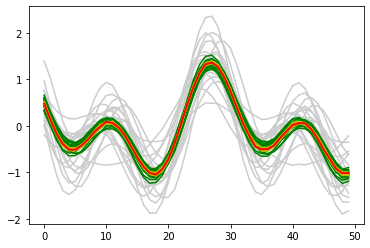

In [17]:
for i, c in enumerate(['0.8', 'g', 'y']):
    xz = sw.xz_store[i]
    x = swyft.get_x(xz)
    for spec in x[:20]:
        plt.plot(spec, color=c)
plt.plot(x0, color='r', lw=2)

In [18]:
post = []
for i in range(NROUNDS):
    post.append(sw.get_posteriors(nround=i))

(0.45, 0.55)

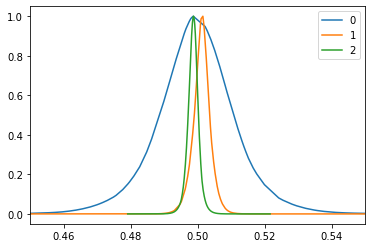

In [21]:
for i in range(NROUNDS):
    plt.plot(post[i][0]['z'], np.exp(post[i][0]['lnL']), label=i)
plt.legend()
plt.xlim([0.45, 0.55])